## CMPINF 2100 Week 08
### Introduction to PCA in order to support Cluster Analysis
## Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

Start with the penguins dataset again.

In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## WHY PCA???

The penguins data has 4 num cols!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


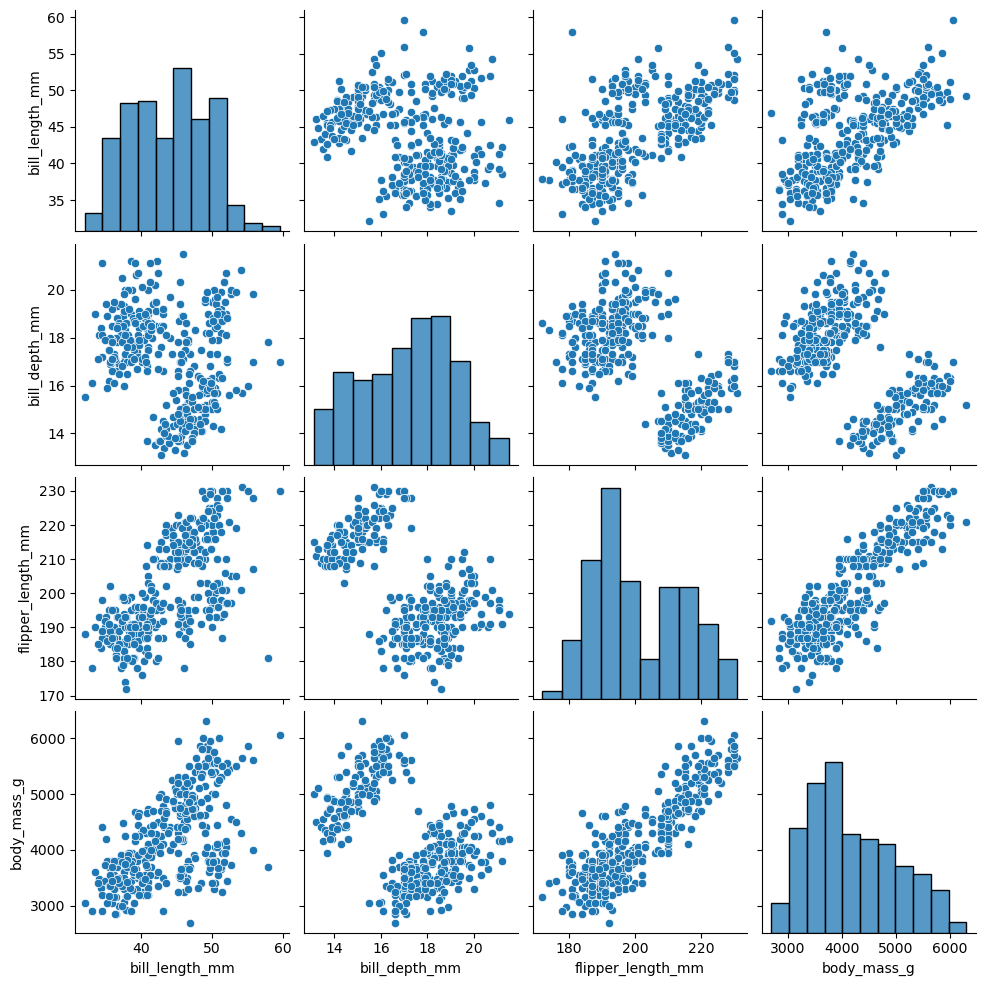

In [5]:
sns.pairplot(data=penguins)

plt.show()

There is a clear relationship or correlation structure between several of the num cols!

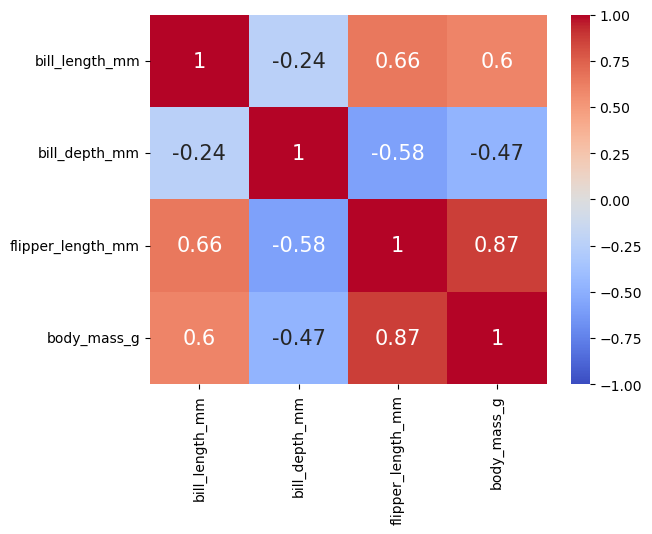

In [7]:
fig, ax = plt.subplots()

sns.heatmap(data=penguins.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            center=0,
            annot=True,
            annot_kws={"fontsize":15},
           cmap="coolwarm")

plt.show()

BUT WHY PCA??

PCA tries to EXPLOIT correlation between variables. This is beneficial because maybe we do NOT actually need to look at ALL pairs of scatter plots!

If we can exploit the RELATIONSHIP between variables, maybe we can CREATE NEW variables that CAPTURE the impact or influence of ALL variables!!!

Then instead of having to explore a large number of figs, we can focus on the relationship between several NEWLY  created variables!!!

PCA will be discussed in more detail in CMPINF 2120. We will also revisit PCA later in the semester in this course CMPINF 2100. But for now lets just see how to **USE** PCA to support visualization.

## Executive PCA

Before executing PCA, we **MUST** deal with MISSINGS, such as DROPPING THEM!! Also, is it HIGHLY RECOMMENDED that you **STANDARDIZE** the variables BEFORE applying PCA!!!

In [8]:
pens_clean = penguins.dropna().copy()

In [9]:
pens_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


STANDARDIZE using StandardScaler() method from scikit-learn.

In [10]:
from sklearn.preprocessing import StandardScaler

Standardize numeric columns

In [11]:
pens_clean_features = pens_clean.select_dtypes("number").copy()

In [12]:
Xpens = StandardScaler().fit_transform(pens_clean_features)

We can use the PCA method from scikit-learn to execute the TRANSFORMATION!!!

The transformation produces NEW vars that ACCOUNT for the relationship between ALL of the original numeric variables!!

In [13]:
from sklearn.decomposition import PCA

PCA follows the logic of StandardScaler. We must:

* INITIALIZE the object based on ASSUMPTIONS
* FIT the object
* TRANSFORM a data set using the FITTED object

The main assumption we need for PCA is the NUMBER OF COMPONENTS or the number of **NEWLY CREATED VARIABLES** to produce.

We will NOT discuss how to decide the BEST number of new vars today. Instead, we will just focus on 2 because we will VISUALIZE 2 numeric variables via scatter plots!!

Apply PCA in 1 line of code by INITIALIZING then FITTING and TRANSFORMING!!!

In [14]:
pca_pens = PCA(n_components=2).fit_transform(Xpens)

In [15]:
type(pca_pens)

numpy.ndarray

In [16]:
pca_pens

array([[-1.85359302e+00,  3.20693765e-02],
       [-1.31625406e+00, -4.43526765e-01],
       [-1.37660509e+00, -1.61230478e-01],
       [-1.88528838e+00, -1.23512351e-02],
       [-1.91998074e+00,  8.17598126e-01],
       [-1.77302031e+00, -3.66222957e-01],
       [-8.18496250e-01,  5.01243084e-01],
       [-1.79895773e+00, -2.45393945e-01],
       [-1.95614892e+00,  9.98282895e-01],
       [-1.56952316e+00,  5.78081948e-01],
       [-1.74800122e+00, -6.10244291e-01],
       [-1.57577371e+00,  8.68357265e-02],
       [-8.04720190e-01,  1.29355592e+00],
       [-2.35017809e+00, -6.45191072e-01],
       [-1.00498645e+00,  1.97242251e+00],
       [-2.40824844e+00, -3.08968645e-01],
       [-2.11369825e+00, -1.36493144e-01],
       [-1.85705729e+00, -1.09144060e-01],
       [-1.50501042e+00, -2.89127997e-01],
       [-1.58113786e+00, -6.03932517e-01],
       [-1.92846722e+00, -2.97394981e-01],
       [-1.76295054e+00,  1.38259762e-01],
       [-1.70361341e+00, -1.87802307e-01],
       [-2.

In [17]:
pca_pens.shape

(333, 2)

In [18]:
Xpens.shape

(333, 4)

In [19]:
pens_clean_features.shape

(333, 4)

Convert the NumPy array pca_pens into a DataFrame to support visualization.

Name the cols, pc01 and pc02.

In [21]:
pca_pens_df = pd.DataFrame(pca_pens, columns=["pc01", "pc02"])

In [22]:
pca_pens_df

pc01      pc02
0   -1.853593  0.032069
1   -1.316254 -0.443527
2   -1.376605 -0.161230
3   -1.885288 -0.012351
4   -1.919981  0.817598
..        ...       ...
328  1.997716 -0.976771
329  1.832651 -0.784510
330  2.751505  0.266556
331  1.713854 -0.725875
332  2.018537  0.336554

[333 rows x 2 columns]

Visualize the relationsip beween these two NEWLY ceated vars as a scatter plot.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


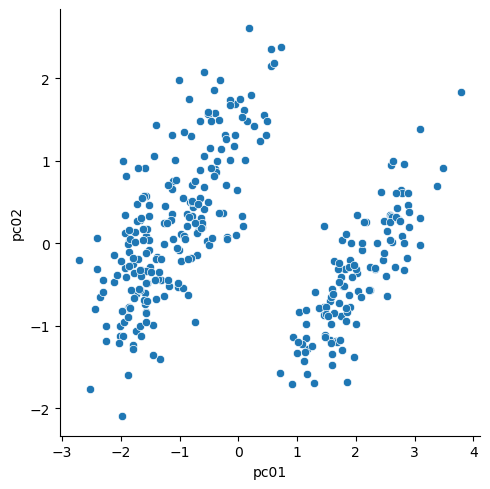

In [23]:
sns.relplot(data=pca_pens_df, x="pc01", y="pc02")

plt.show()

Lets calculate the CORRELATION MATRIX between these two new vars!

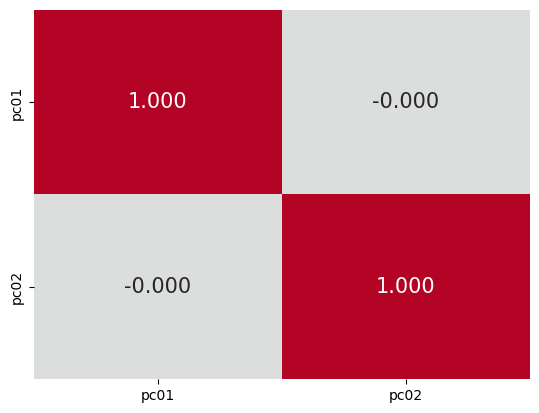

In [31]:
fig, ax = plt.subplots()

sns.heatmap(pca_pens_df.corr(), 
            vmin=-1,
            vmax=1,
            center=0,
            fmt=".3f",
            cmap="coolwarm",
            cbar=False,
            annot=True,
            annot_kws={"fontsize": 15},
            ax=ax)

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


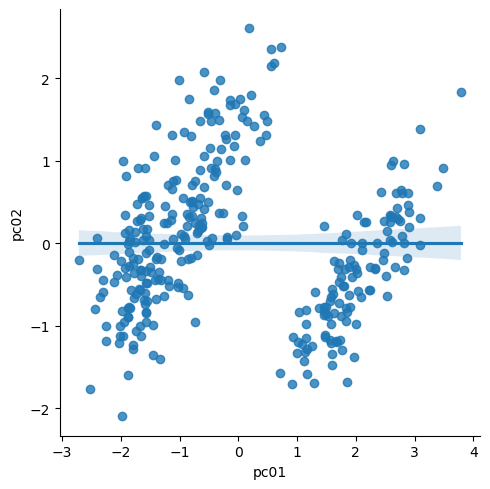

In [32]:
sns.lmplot(data=pca_pens_df, x="pc01", y="pc02")

plt.show()

But we can include GROUPING variables with our PCA!!!

In [33]:
pca_pens_df["species"] = pens_clean.species

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


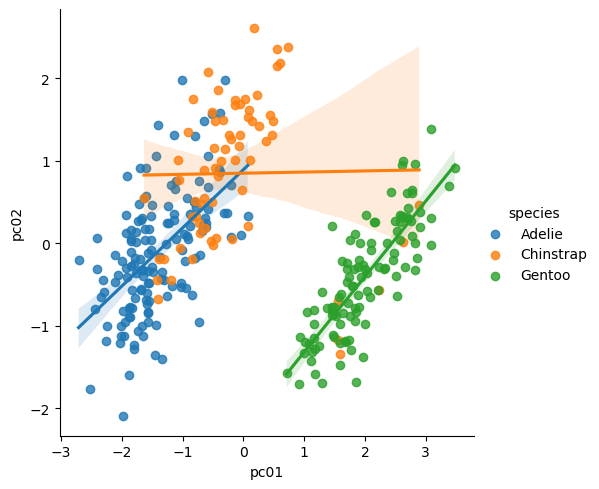

In [36]:
sns.lmplot(data=pca_pens_df, x="pc01", y="pc02", hue="species")

plt.show()

We saw it was easy to SEPARATE the penguins data into 2 clusters!!

The PCA or the NEWLY CREATED VARS are EASILY identifying the 2 PRIMARY GROUPS in the data!!!!

## Clustering and PCA

Instead of visualizing the Clustering results on the original variables, lets visualize the CLUSTERING results with the NEWLY created PCA!!!

In [38]:
from sklearn.cluster import KMeans

In [42]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict(Xpens)

In [44]:
pca_pens_df['k2'] = pd.Series(clusters_2, index=pca_pens_df.index).astype("category")

In [45]:
pca_pens_df

pc01      pc02 species k2
0   -1.853593  0.032069  Adelie  0
1   -1.316254 -0.443527  Adelie  0
2   -1.376605 -0.161230  Adelie  0
3   -1.885288 -0.012351     NaN  0
4   -1.919981  0.817598  Adelie  0
..        ...       ...     ... ..
328  1.997716 -0.976771  Gentoo  1
329  1.832651 -0.784510  Gentoo  1
330  2.751505  0.266556  Gentoo  1
331  1.713854 -0.725875  Gentoo  1
332  2.018537  0.336554  Gentoo  1

[333 rows x 4 columns]

In [46]:
pca_pens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   pc01     333 non-null    float64 
 1   pc02     333 non-null    float64 
 2   species  324 non-null    object  
 3   k2       333 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 8.4+ KB


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


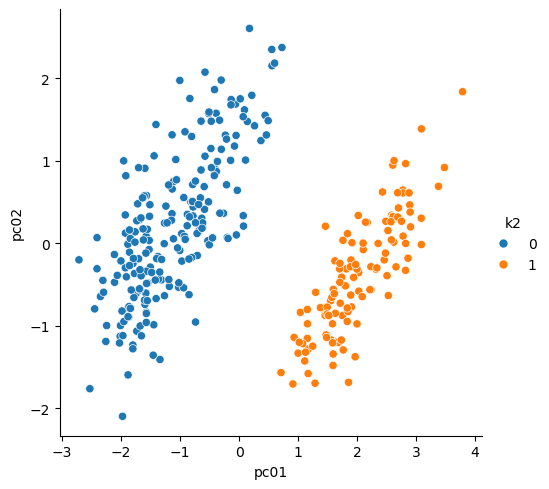

In [47]:
sns.relplot(data=pca_pens_df, x="pc01", y="pc02", hue="k2")

plt.show()

## Larger example

On canvas, there is a WINE DATA SET.

In [48]:
wine_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

In [50]:
wine_names = ['Cultivar', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
              'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanin', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']

In [51]:
wine_data = pd.read_csv(wine_url, names=wine_names)

In [52]:
wine_data

Cultivar  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0           1    14.23        1.71  2.43               15.6        127   
1           1    13.20        1.78  2.14               11.2        100   
2           1    13.16        2.36  2.67               18.6        101   
3           1    14.37        1.95  2.50               16.8        113   
4           1    13.24        2.59  2.87               21.0        118   
..        ...      ...         ...   ...                ...        ...   
173         3    13.71        5.65  2.45               20.5         95   
174         3    13.40        3.91  2.48               23.0        102   
175         3    13.27        4.28  2.26               20.0        120   
176         3    13.17        2.59  2.37               20.0        120   
177         3    14.13        4.10  2.74               24.5         96   

     Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanin  \
0             2.80        3.06                  0.28            2.29   
1             2.65        2.76                  0.26            1.28   
2             2.80        3.24                  0.30            2.81   
3             3.85        3.49                  0.24            2.18   
4             2.80        2.69                  0.39            1.82   
..             ...         ...                   ...             ...   
173           1.68        0.61                  0.52            1.06   
174           1.80        0.75                  0.43            1.41   
175           1.59        0.69                  0.43            1.35   
176           1.65        0.68                  0.53            1.46   
177           2.05        0.76                  0.56            1.35   

     Color_intensity   Hue  OD280_OD315  Proline  
0               5.64  1.04         3.92     1065  
1               4.38  1.05         3.40     1050  
2               5.68  1.03         3.17     1185  
3               7.80  0.86         3.45     1480  
4               4.32  1.04         2.93      735  
..               ...   ...          ...      ...  
173             7.70  0.64         1.74      740  
174             7.30  0.70         1.56      750  
175            10.20  0.59         1.56      835  
176             9.30  0.60         1.62      840  
177             9.20  0.61         1.60      560  

[178 rows x 14 columns]

In [53]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivar              178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanin        178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [54]:
wine_data.isna().sum()

Cultivar                0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanin          0
Color_intensity         0
Hue                     0
OD280_OD315             0
Proline                 0
dtype: int64

In [56]:
wine_data.Cultivar.value_counts()

Cultivar
2    71
1    59
3    48
Name: count, dtype: int64

In [ ]:
Convert Cultivar to a categorical variable.

In [58]:
wine_data["Cultivar"] = wine_data.Cultivar.astype("category")

In [59]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Cultivar              178 non-null    category
 1   Alcohol               178 non-null    float64 
 2   Malic_acid            178 non-null    float64 
 3   Ash                   178 non-null    float64 
 4   Alcalinity_of_ash     178 non-null    float64 
 5   Magnesium             178 non-null    int64   
 6   Total_phenols         178 non-null    float64 
 7   Flavanoids            178 non-null    float64 
 8   Nonflavanoid_phenols  178 non-null    float64 
 9   Proanthocyanin        178 non-null    float64 
 10  Color_intensity       178 non-null    float64 
 11  Hue                   178 non-null    float64 
 12  OD280_OD315           178 non-null    float64 
 13  Proline               178 non-null    int64   
dtypes: category(1), float64(11), int64(2)
memory usage: 18.5 K

Why will PCA help here?

We could make a PAIRS PLOT between all 13 numeric columns...

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


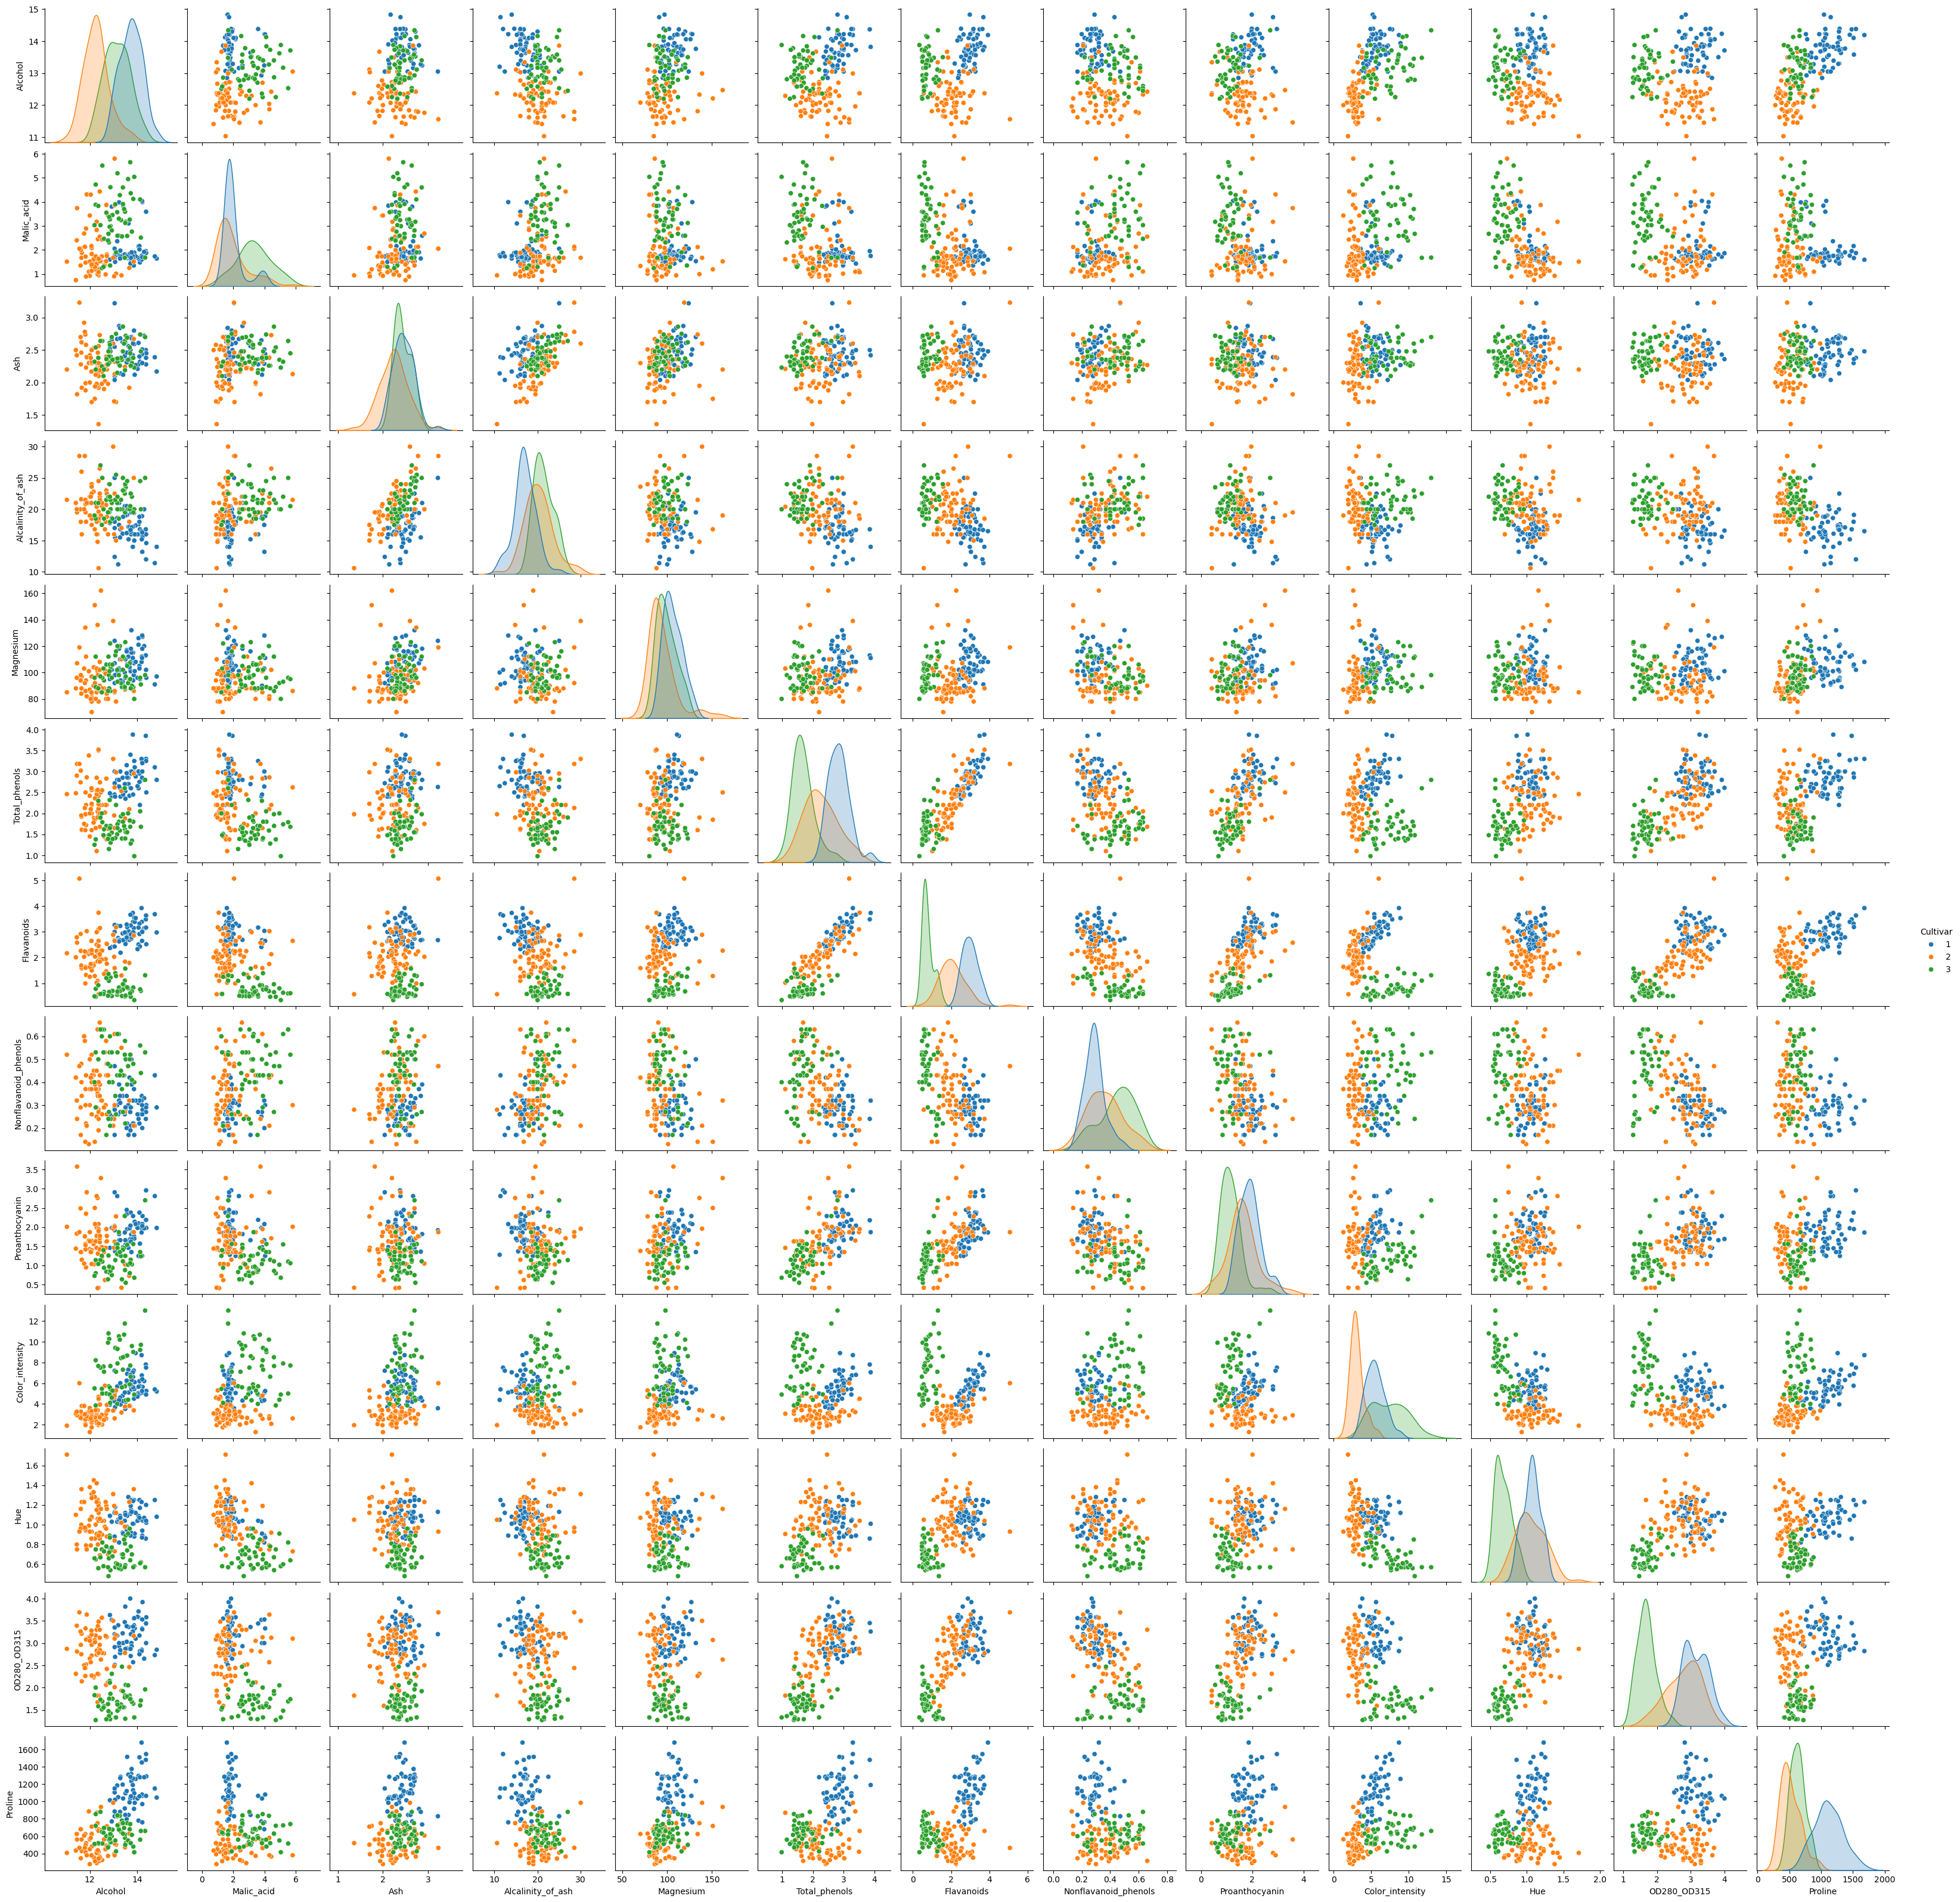

In [61]:
sns.pairplot(data=wine_data, 
             hue="Cultivar",
             diag_kws={"common_norm":False})

plt.show()

PCA allows us to EXPLOIT relationships between columns!!

We know if there are relationships by creating CORRELATION PLOTS!!!

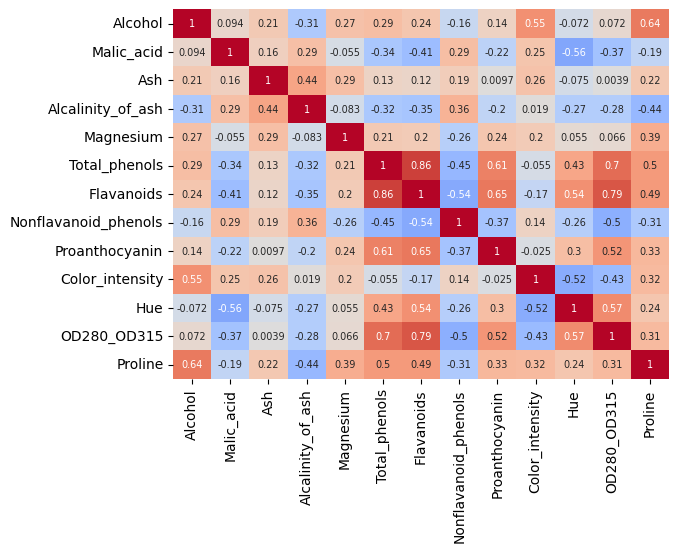

In [68]:
fig, ax = plt.subplots()

sns.heatmap(data=wine_data.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            center=0,
            cbar=False,
            cmap="coolwarm",
            annot=True,
            annot_kws={"fontsize":7},
            ax=ax)

plt.show()

BEFORE we execute PCA, we need to check the MAGNITUDE and SCALES!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


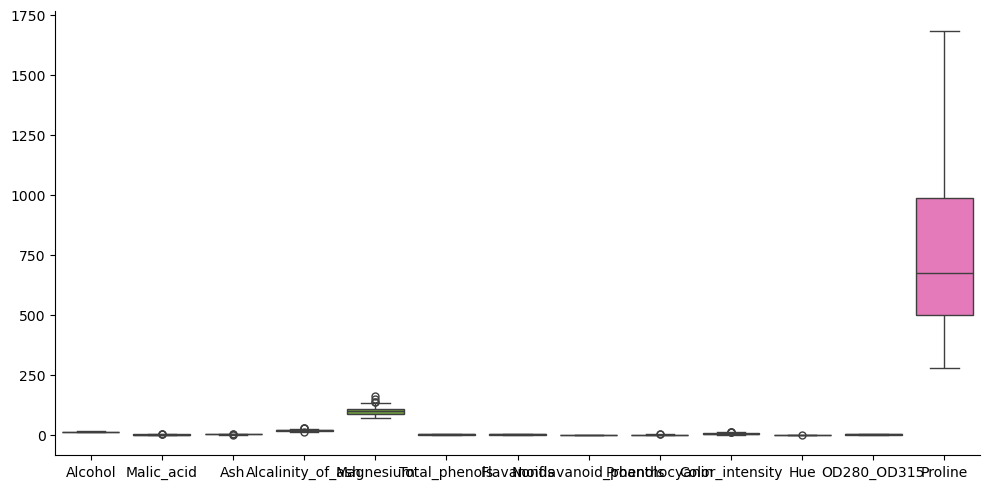

In [69]:
sns.catplot(data=wine_data, kind="box", aspect=2)

plt.show()

## Preprocess or STANDARDIZE the data

In [77]:
wine_data_features = wine_data.select_dtypes("number").copy()

In [78]:
wine_data_features

Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanin  Color_intensity   Hue  \
0          3.06                  0.28            2.29             5.64  1.04   
1          2.76                  0.26            1.28             4.38  1.05   
2          3.24                  0.30            2.81             5.68  1.03   
3          3.49                  0.24            2.18             7.80  0.86   
4          2.69                  0.39            1.82             4.32  1.04   
..          ...                   ...             ...              ...   ...   
173        0.61                  0.52            1.06             7.70  0.64   
174        0.75                  0.43            1.41             7.30  0.70   
175        0.69                  0.43            1.35            10.20  0.59   
176        0.68                  0.53            1.46             9.30  0.60   
177        0.76                  0.56            1.35             9.20  0.61   

     OD280_OD315  Proline  
0           3.92     1065  
1           3.40     1050  
2           3.17     1185  
3           3.45     1480  
4           2.93      735  
..           ...      ...  
173         1.74      740  
174         1.56      750  
175         1.56      835  
176         1.62      840  
177         1.60      560  

[178 rows x 13 columns]

In [79]:
Xwine = StandardScaler().fit_transform(wine_data_features)

In [80]:
Xwine

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


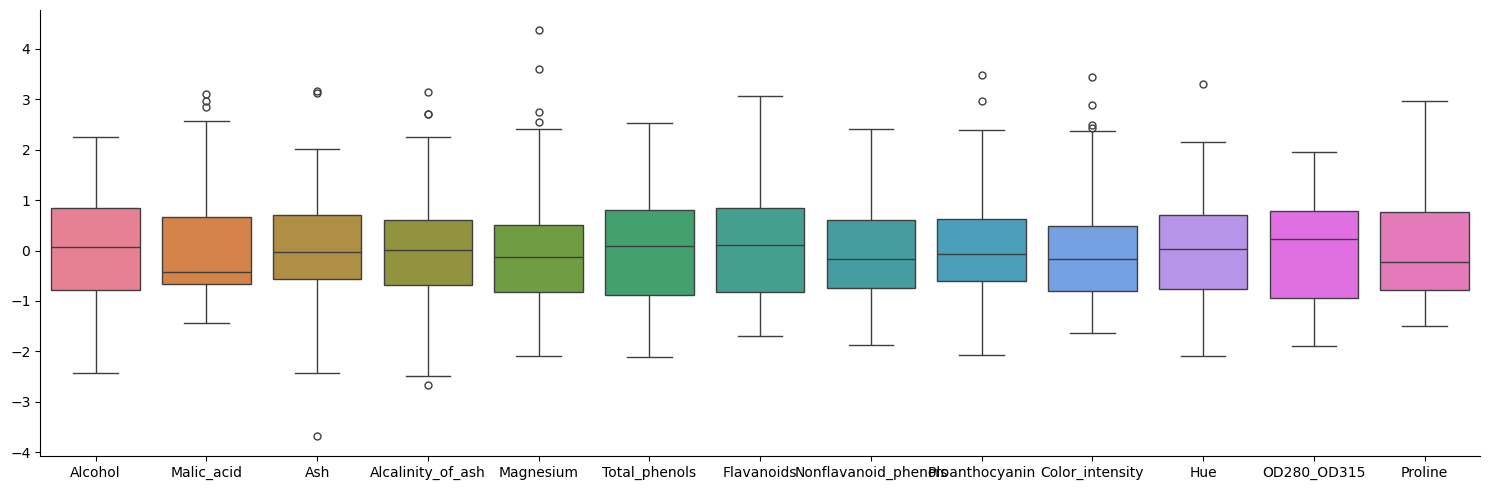

In [83]:
sns.catplot(data=pd.DataFrame(Xwine, columns=wine_data_features.columns), kind="box", aspect=3)

plt.show()

Execute PCA and return 2 newly created variables!!

In [84]:
pca_wine = PCA(n_components=2).fit_transform(Xwine)

In [85]:
pca_wine

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [86]:
pca_wine_df = pd.DataFrame(pca_wine, columns=["pc01", "pc02"])

In [87]:
pca_wine_df

pc01      pc02
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
..        ...       ...
173 -3.370524 -2.216289
174 -2.601956 -1.757229
175 -2.677839 -2.760899
176 -2.387017 -2.297347
177 -3.208758 -2.768920

[178 rows x 2 columns]

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


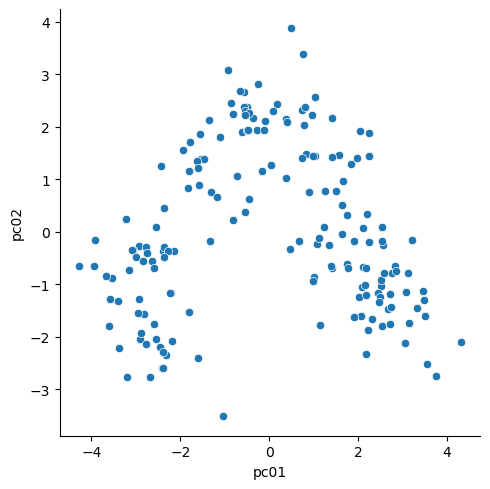

In [88]:
sns.relplot(data=pca_wine_df, x="pc01", y="pc02")

plt.show()

Lets add the KNOWN Groupings

In [89]:
pca_wine_df["Cultivar"] = wine_data.Cultivar

In [90]:
pca_wine_df

pc01      pc02 Cultivar
0    3.316751 -1.443463        1
1    2.209465  0.333393        1
2    2.516740 -1.031151        1
3    3.757066 -2.756372        1
4    1.008908 -0.869831        1
..        ...       ...      ...
173 -3.370524 -2.216289        3
174 -2.601956 -1.757229        3
175 -2.677839 -2.760899        3
176 -2.387017 -2.297347        3
177 -3.208758 -2.768920        3

[178 rows x 3 columns]

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


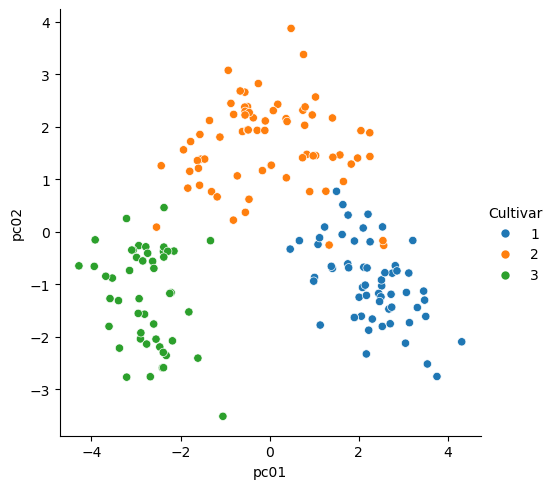

In [91]:
sns.relplot(data=pca_wine_df, x="pc01", y="pc02", hue="Cultivar")

plt.show()

Run KMeans with 3 Clusters and visualize the 3 cluster labels with the NEWLY CREATED PCA!!!

In [92]:
clusters_3 = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict(Xwine)

In [93]:
clusters_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [97]:
pca_wine_df["k3"] = pd.Series(clusters_3, index=pca_wine_df.index).astype("category")

In [98]:
pca_wine_df

pc01      pc02 Cultivar k3
0    3.316751 -1.443463        1  1
1    2.209465  0.333393        1  1
2    2.516740 -1.031151        1  1
3    3.757066 -2.756372        1  1
4    1.008908 -0.869831        1  1
..        ...       ...      ... ..
173 -3.370524 -2.216289        3  0
174 -2.601956 -1.757229        3  0
175 -2.677839 -2.760899        3  0
176 -2.387017 -2.297347        3  0
177 -3.208758 -2.768920        3  0

[178 rows x 4 columns]

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


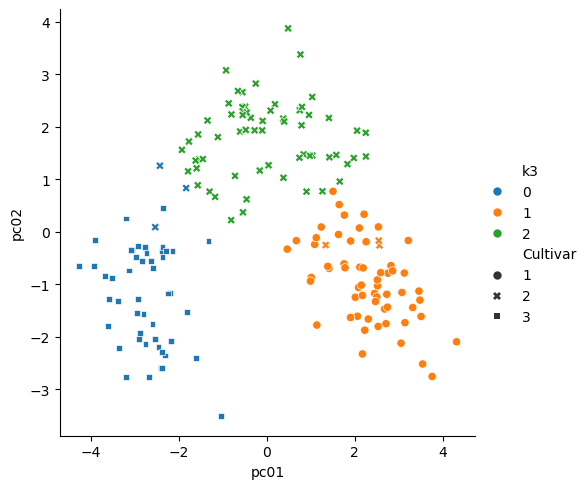

In [99]:
sns.relplot(data=pca_wine_df, x="pc01", y="pc02", hue="k3", style="Cultivar")

plt.show()

## A really big example
Use the Sonar data!

In [100]:
sonar_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

In [101]:
sonar_df = pd.read_csv( sonar_url, header=None )

In [102]:
sonar_df.shape

(208, 61)

Convert the col names to strings.

In [105]:
sonar_df.columns = ["X%02d" % d for d in sonar_df.columns]

In [106]:
sonar_df.columns

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59',
       'X60'],
      dtype='object')

In [107]:
sonar_df.nunique()

X00    177
X01    182
X02    190
X03    181
X04    193
      ... 
X56    121
X57    124
X58    119
X59    109
X60      2
Length: 61, dtype: int64

In [108]:
sonar_df.X60.value_counts()

X60
M    111
R     97
Name: count, dtype: int64

In [110]:
sonar_df.isna().sum().max()

0

Lets look at the correlation structure between ALL numeric cols!

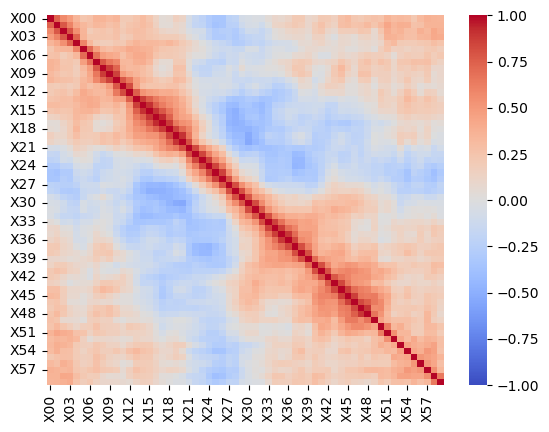

In [112]:
fig, ax = plt.subplots()

sns.heatmap(sonar_df.corr(numeric_only=True),
            vmin=-1, 
            vmax=1,
            center=0,
            cmap="coolwarm",
            ax=ax)

plt.show()

Even tho there are 60 numeric columns many of the vars are HIGHLY CORRELATED!!

Lets exploit the correlation thru PCA!!

But first, we must check the scales!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


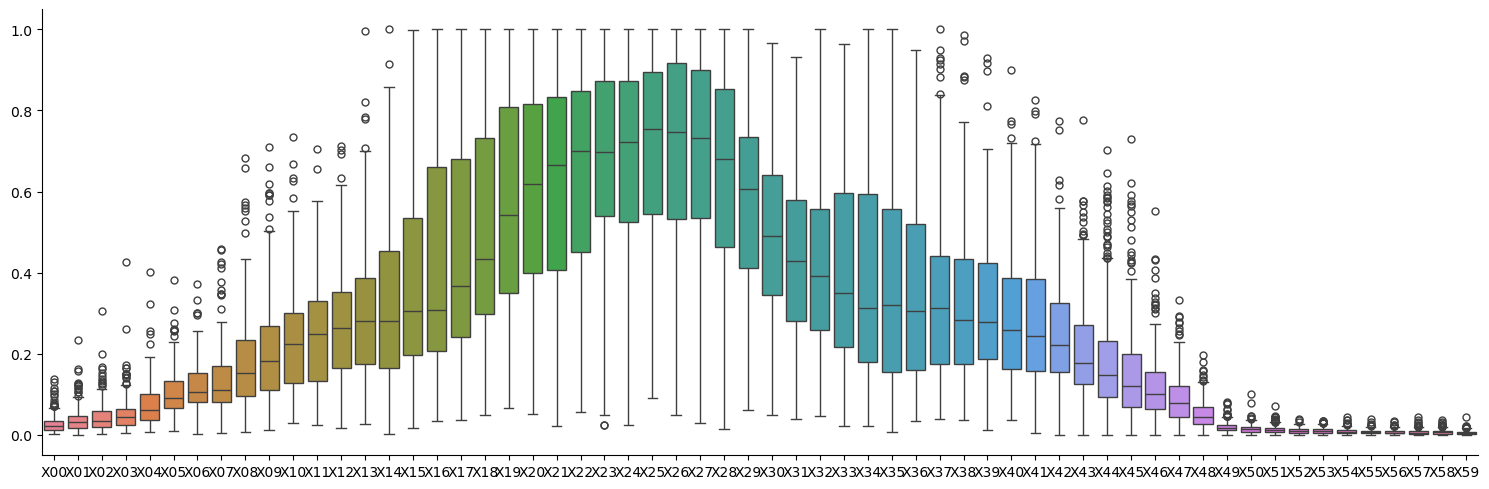

In [114]:
sns.catplot(data=sonar_df, kind="box", aspect=3)

plt.show()

The SCALES are NOT the same across cols so we need to standardize.

In [115]:
sonar_features = sonar_df.select_dtypes("number").copy()

In [116]:
Xsonar = StandardScaler().fit_transform(sonar_features)

In [117]:
Xsonar

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]])

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


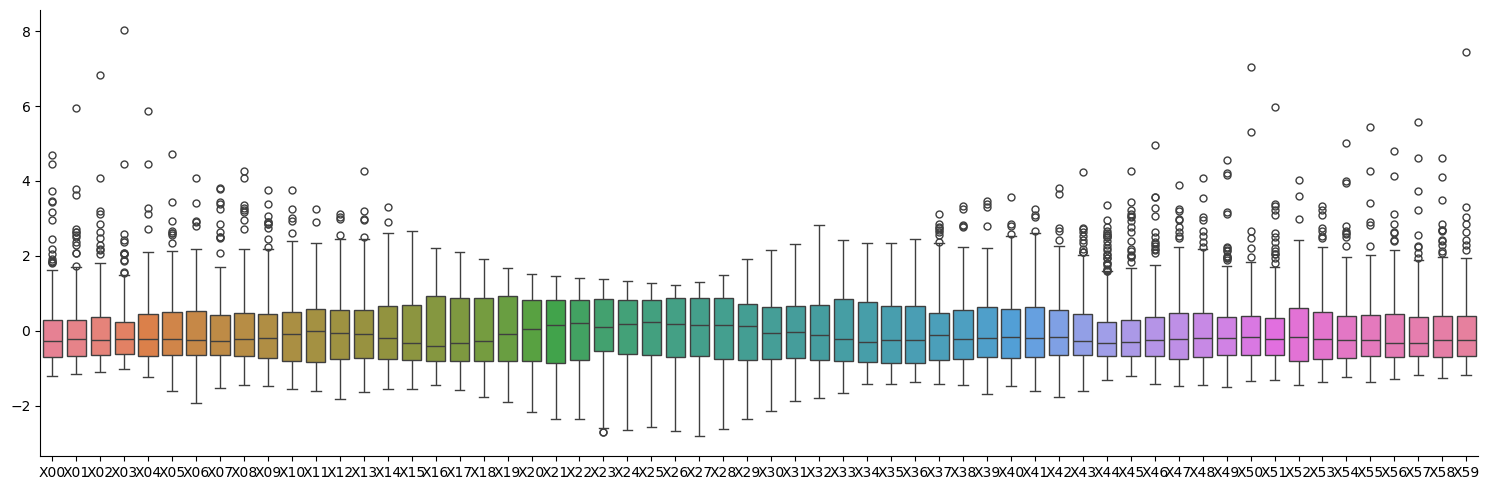

In [121]:
sns.catplot(data=pd.DataFrame(Xsonar, columns=sonar_features.columns), kind="box", aspect=3)

plt.show()

APPLY PCA and return 2 NEWLY Created Variables to support visualization!!

In [122]:
sonar_pca = PCA(n_components=2).fit_transform(Xsonar)

In [123]:
sonar_pca

array([[ 1.92116817, -1.37089312],
       [-0.48012458,  7.58638801],
       [ 3.8592282 ,  6.43986016],
       [ 4.59741943, -3.10408888],
       [-0.53386761,  1.84984701],
       [-1.24701593,  3.78548414],
       [ 1.87007312,  2.49551038],
       [-2.05769816,  2.3147504 ],
       [-1.64556277,  0.25372155],
       [-4.28065736, -2.42781795],
       [-1.46164351, -6.32305562],
       [-2.46394888, -1.2537634 ],
       [-3.99546982,  1.64506244],
       [ 0.6370814 , -0.63741683],
       [-0.10539302, -0.25210417],
       [ 2.11242307,  0.59393523],
       [ 4.39574903, -2.25749069],
       [ 1.43859617,  1.90219042],
       [-1.03943408, -3.29436397],
       [-1.16485881,  8.59655069],
       [ 2.64812566,  1.66803742],
       [ 6.23535677, -1.47389049],
       [11.23389579, -2.75609298],
       [-0.24732176, -4.86351661],
       [ 2.65154822, -4.39934635],
       [-0.42203896, -7.16826626],
       [-3.69919995,  2.49392786],
       [-2.90589296,  0.16356259],
       [-1.8957691 ,

In [124]:
sonar_pca_df = pd.DataFrame(sonar_pca, columns=["pc01", "pc02"])

In [125]:
sonar_pca_df

pc01      pc02
0    1.921168 -1.370893
1   -0.480125  7.586388
2    3.859228  6.439860
3    4.597419 -3.104089
4   -0.533868  1.849847
..        ...       ...
203 -1.207653 -0.968174
204 -2.971439 -2.753492
205 -2.293210 -2.755446
206 -3.114464 -1.850550
207 -3.238624 -2.277094

[208 rows x 2 columns]

In [127]:
sonar_pca_df["X60"] = sonar_df.X60

In [128]:
sonar_pca_df

pc01      pc02 X60
0    1.921168 -1.370893   R
1   -0.480125  7.586388   R
2    3.859228  6.439860   R
3    4.597419 -3.104089   R
4   -0.533868  1.849847   R
..        ...       ...  ..
203 -1.207653 -0.968174   M
204 -2.971439 -2.753492   M
205 -2.293210 -2.755446   M
206 -3.114464 -1.850550   M
207 -3.238624 -2.277094   M

[208 rows x 3 columns]

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


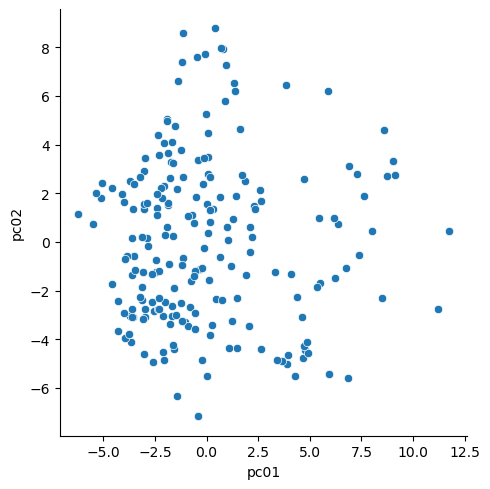

In [130]:
sns.relplot(data=sonar_pca_df, x="pc01", y="pc02")

plt.show()

Color by the categorical variable.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


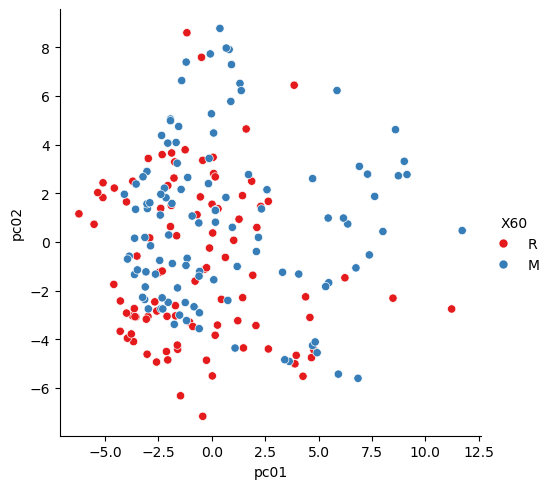

In [132]:
sns.relplot(data=sonar_pca_df, x="pc01", y="pc02", hue="X60", palette="Set1")

plt.show()